# Sales Analysis, Forecasting and Demand Planning Project 

## Project Overview  
This project focuses on developing a robust sales forecasting and demand planning system for retail businesses. By analyzing historical sales data, we aim to optimize production, inventory management, and resource planning by accurately predicting future sales trends. Leveraging machine learning and statistical models, this project provides actionable insights to improve operational efficiency, reduce costs, and enhance customer satisfaction.

---

## About the Dataset  

This dataset provides historical sales data for the retail furniture sector, serving as a valuable resource for business analysis. It includes detailed transaction-level information that can be used to understand sales trends, forecast future demand, and optimize inventory. The dataset enables informed decision-making to ensure business stability and growth in the competitive retail environment.

## Data Source

This sales data is available on Kaggle in the following Link,

> https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset

### Dataset Features  

| Feature          | Description                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| `Row ID`         | Sequential identifier for each row.                                                 |
| `Order ID`       | Unique identifier for each sales order.                                             |
| `Order Date`     | Date of the sales order.                                                            |
| `Ship Date`      | Date of shipment for the order.                                                     |
| `Ship Mode`      | Mode of shipment for the order.                                                     |
| `Customer ID`    | Unique identifier for each customer.                                                |
| `Customer Name`  | Name of the customer.                                                               |
| `Segment`        | Segment classification of the customer.                                             |
| `Country`        | Country where the sale occurred.                                                    |
| `City`           | City where the sale occurred.                                                       |
| `State`          | State where the sale occurred.                                                      |
| `Postal Code`    | Postal code where the sale occurred.                                                |
| `Region`         | Geographical region where the sale occurred.                                        |
| `Product ID`     | Unique identifier for each product.                                                 |
| `Category`       | Category classification of the product.                                             |
| `Sub-Category`   | Sub-category classification of the product.                                         |
| `Product Name`   | Name of the product.                                                                |
| `Sales`          | Total sales amount for the order.                                                   |
| `Quantity`       | Quantity of products sold in the order.                                             |
| `Discount`       | Discount applied to the order.                                                      |
| `Profit`         | Profit generated from the order.                                                    |

---

## Business Objectives  

1. **Sales Forecasting:**  
   - Predict sales for the next 30 days for each product category.  
   - Identify and leverage trends and seasonality in sales patterns.  

2. **Demand Planning:**  
   - Determine products or categories likely to experience surges in demand.  
   - Reduce overstocking and understocking through accurate forecasts.  

3. **Optimization:**  
   - Optimize production schedules and inventory management.  
   - Identify periods requiring special promotions to counter seasonal declines.  

---

## Methodology  

### 1. **Data Understanding**  
   - **Data Collection:** Gather historical sales data, pricing, promotions, holidays, and external factors (e.g., weather).  
   - **Exploratory Data Analysis (EDA):** Perform statistical analysis and create visualizations to uncover trends, seasonality, and anomalies.  
   - **Data Quality Assessment:** Identify and address missing, inconsistent, or irrelevant data.  

### 2. **Data Preparation**  
   - **Data Cleaning:** Handle missing values, outliers, and duplicates. Normalize sales data if necessary.  
   - **Feature Engineering:** Create lag variables, rolling averages, seasonal indices, and encode categorical variables for modeling.  
   - **Data Splitting:** Split the dataset into training, validation, and testing sets.  

### 3. **Modeling**  
   - **Baseline Models:** Develop simple models such as moving averages or exponential smoothing for benchmarking.  
   - **Advanced Models:** Train machine learning (e.g., ARIMA, SARIMA, XGBoost, Random Forest) and deep learning models (e.g., LSTM, GRU, Prophet).  
   - **Hyperparameter Optimization:** Fine-tune models to enhance accuracy and efficiency.  

### 4. **Evaluation**  
   - **Evaluation Metrics:** Use RMSE, MAPE, MAE, and R² to assess model performance.  
   - **Visualization:** Plot predicted vs. actual sales to analyze trends and deviations.  
   - **Model Selection:** Choose the best-performing model for deployment.  

---

## Applications  

- **Inventory Management:** Ensure optimal inventory levels, minimizing costs associated with overstocking or stockouts.  
- **Production Planning:** Use forecasts to adjust production schedules based on predicted demand.  
- **Promotional Campaigns:** Identify low-demand periods and design targeted promotions to boost sales.  
- **Revenue Forecasting:** Provide accurate revenue projections to guide financial planning.  

---

## Research Questions  

1. What are the expected sales for the next 30 days for each product category?  
2. Which products or categories show clear trends or seasonal demand patterns?  
3. How can accurate demand forecasts improve inventory management and reduce operational costs?  
4. Which time periods require targeted promotional strategies to mitigate sales dips?  

---

## Results and Insights  

1. **Seasonal Trends:** Sales demonstrate clear peaks during holiday seasons and dips during specific months.  
2. **Top-Selling Products:** Analysis of product categories reveals best-performing items and their contribution to revenue.  
3. **Demand Surges:** Certain products experience predictable spikes in demand, enabling proactive inventory management.  
4. **Model Performance:** LSTM and SARIMA models outperformed baseline methods in forecasting accuracy.  

---

## Conclusion  

This project equips retail businesses with powerful forecasting tools to make data-driven decisions. By understanding historical sales patterns, businesses can optimize inventory, enhance production efficiency, and maximize profitability while maintaining customer satisfaction.


### Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from mlxtend.frequent_patterns import apriori, association_rules

### Settings

In [2]:
# Warning
warnings.filterwarnings("ignore")

# Dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "stores_sales_forecasting.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path, encoding="latin1")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### Product Performance Analysis

- **Goal:** Determine top-performing and underperforming products or categories.

#### Techniques:

- Analyze sales by product sub-category, product name, or region.
- Use **Pareto Analysis** (80/20 rule) to find products generating **80%** of revenue.
- Identify seasonal trends in product sales.

#### Product Sub-Category Analysis

**Steps:**

- Identify and segment the data by the four subcategories.
- Compute total Sales and Profit for each subcategory.
- Calculate average Sales and Profit per sale at the subcategory level.
- alculate the Profit Margin (%) for each subcategory:
   - **Profit Margin =(Profit / Sales) × 100**
- Highlight subcategories with negative or low margins.
- Create plots for total sales and profit across subcategories.

SALES AND PROFIT ANALYSIS FOR SUB-CATEGORY
  Sub-Category  Total_Sales  Total_Profit   Avg_Sales  Avg_Profit  Profit_Percentage
0    Bookcases  114879.9963    -3472.5560  503.859633  -15.230509          -3.022768
1       Chairs  328449.1030    26590.1663  532.332420   43.095894           8.095673
2  Furnishings   91705.1640    13059.1436   95.825668   13.645918          14.240358
3       Tables  206965.5320   -17725.4811  648.794771  -55.565771          -8.564460





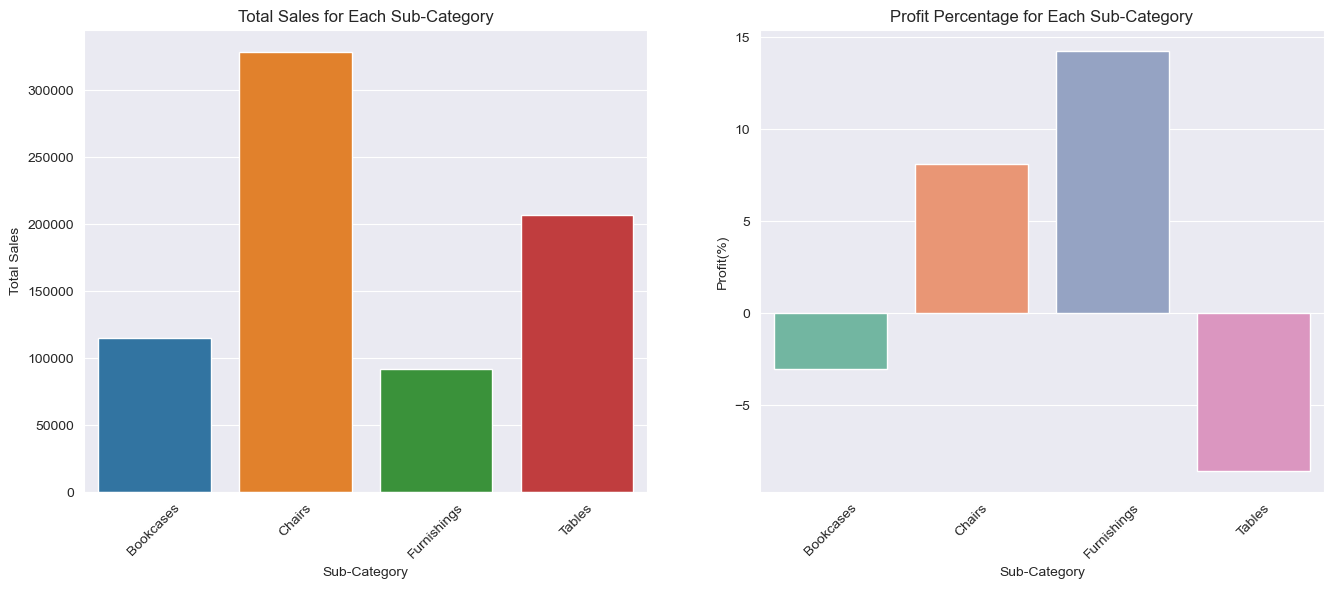

In [5]:
subcategory_performance = df.groupby("Sub-Category").agg(
    Total_Sales= ("Sales", "sum"),
    Total_Profit= ("Profit", "sum"),
    Avg_Sales= ("Sales", "mean"),
    Avg_Profit= ("Profit", "mean")
).reset_index()
# Calculate Profit Percentage
subcategory_performance["Profit_Percentage"] = subcategory_performance["Total_Profit"] / subcategory_performance["Total_Sales"] * 100

print("=" * 60)
print("SALES AND PROFIT ANALYSIS FOR SUB-CATEGORY")
print("=" * 60)
print(subcategory_performance)
print("\n\n")

plt.figure(figsize=(16, 6))
# Visualize the Total Sales
plt.subplot(1,2,1)
sns.barplot(data = subcategory_performance, x= "Sub-Category", y= "Total_Sales", hue="Sub-Category")
plt.title("Total Sales for Each Sub-Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)

# Visualize the Profit Percentage
plt.subplot(1,2,2)
sns.barplot(data = subcategory_performance, x= "Sub-Category", y= "Profit_Percentage", hue="Sub-Category", palette="Set2")
plt.title("Profit Percentage for Each Sub-Category")
plt.ylabel("Profit(%)")
plt.xticks(rotation=45)
plt.show()

### Key Findings

#### Top Performing Subcategory:

- Furnishings have the highest profit margin (**14%**) and total profit (**$13,059**).

#### Underperforming Subcategory:

- Tables have a negative profit margin (**-8.56%**), indicating potential pricing or cost issues.

#### Improvement Opportunities:

- Focus on boosting sales of **Bookcases** and increasing margins for **Chairs**.
- Investigate why **Tables** result in a loss and consider adjusting pricing or production costs.


#### Product Sub-Category Analysis Region Wise

**Steps:**

- Aggregate metrics such as **Total Sales, Total Profit, and Average Profit per Sale** for each subcategory within each region.
- alculate the Profit Margin (%) for each subcategory:
   - **Profit Margin =(Profit / Sales) × 100**
- Identify regions where specific subcategories perform better or worse.
- Highlight opportunities for targeted strategies in underperforming regions.

SALES AND PROFIT ANALYSIS FOR SUB-CATEGORY IN EACH REGION
     Region Sub-Category  Total_Sales  Total_Profit   Avg_Sales  Avg_Profit  Profit_Percentage
0   Central    Bookcases   24157.1768    -1997.9043  483.143536  -39.958086          -8.270438
1   Central       Chairs   85230.6460     6592.7221  553.445753   42.809884           7.735154
2   Central  Furnishings   15254.3700    -3906.2168   74.411561  -19.054716         -25.607198
3   Central       Tables   39154.9710    -3559.6504  543.819042  -49.439589          -9.091184
4      East    Bookcases   43819.3340    -1167.6318  625.990486  -16.680454          -2.664650
5      East       Chairs   96260.6830     9357.7706  572.980256   55.701015           9.721280
6      East  Furnishings   29071.3800     5881.4071  102.725724   20.782357          20.230918
7      East       Tables   39139.8070   -11025.3801  489.247588 -137.817251         -28.169224
8     South    Bookcases   10899.3620     1339.4918  389.262929   47.838993          12

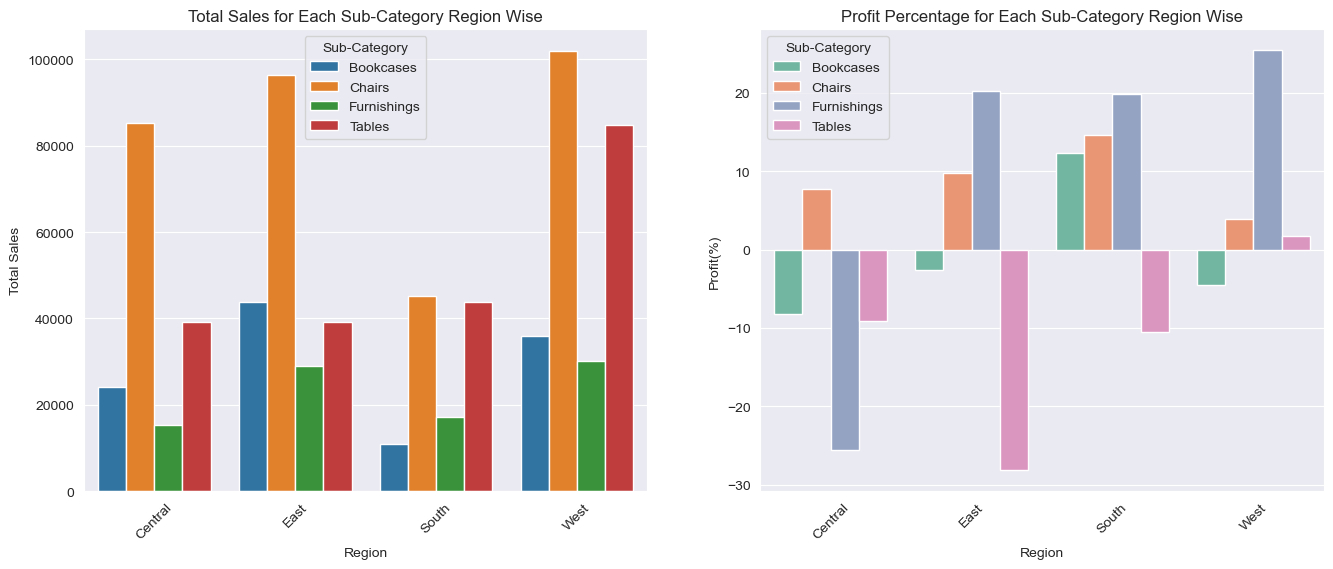

In [6]:
region_subcategory_performance = df.groupby(["Region", "Sub-Category"]).agg(
    Total_Sales= ("Sales", "sum"),
    Total_Profit= ("Profit", "sum"),
    Avg_Sales= ("Sales", "mean"),
    Avg_Profit= ("Profit", "mean")
).reset_index()
# Calculate Profit Percentage
region_subcategory_performance["Profit_Percentage"] = region_subcategory_performance["Total_Profit"] / region_subcategory_performance["Total_Sales"] * 100

print("=" * 100)
print("SALES AND PROFIT ANALYSIS FOR SUB-CATEGORY IN EACH REGION")
print("=" * 100)
print(region_subcategory_performance)
print("\n\n")

plt.figure(figsize=(16, 6))
# Visualize the Total Sales
plt.subplot(1,2,1)
sns.barplot(data = region_subcategory_performance, x= "Region", y= "Total_Sales", hue="Sub-Category")
plt.title("Total Sales for Each Sub-Category Region Wise")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)

# Visualize the Profit Percentage
plt.subplot(1,2,2)
sns.barplot(data = region_subcategory_performance, x= "Region", y= "Profit_Percentage", hue="Sub-Category", palette="Set2")
plt.title("Profit Percentage for Each Sub-Category Region Wise")
plt.ylabel("Profit(%)")
plt.xticks(rotation=45)
plt.show()

### Key Findings

#### Top-performing regions and subcategories:

- **Chairs** have highest sales in **West** region and a very decent sale in **East and Central** regions as well.
- **Furnishings** have the highest profit margin(**25%**) in **West** region and maintain a decent profit margin(**20%**) in **East and South** regions.

#### Underperforming products in specific regions:

- **Tables** in the **East** region show a negative profit margin (**-28%**), requiring investigation into pricing or cost-related issues.

#### Improvement Opportunities:

- Focus on boosting sales of **Bookcases** in **South** region and increasing margins for **Chairs** in **West** Region.
- Investigate why **Furnishings** in **Central** region result in a loss and consider adjusting pricing or production costs.
- Investigate why **Tables** in all regions except **West** region result in a loss and consider adjusting pricing or production costs.

#### Product-Wise Analysis

**1. Aggregate Metrics for Each Product**

- Group data by Product and calculate key metrics such as:
    - Total Sales
    - Total Profit
    - Average Sales Per Transaction
    - Average Profit Per Transaction
    - **Profit Margin =(Profit / Sales) × 100**

**2. Rank Products**

- Rank products based on Total Sales and Total Profit to identify top and bottom performers.

**3. Visualize Performance**

- Use bar charts or scatter plots to visualize:
- Total Sales and Profit per Product.
- Profit Margin vs. Sales for individual products.

**4. Segmentation**

Categorize products into segments like:

- High Sales, High Profit
- High Sales, Low Profit
- Low Sales, High Profit
- Low Sales, Low Profit

In [17]:
# Calculate Total, Sales, Proft, Quantity Sold and Rank the accrodingly
product_performance = df.groupby("Product Name").agg(
    Total_Sales= ("Sales", "sum"),
    Total_Profit= ("Profit", "sum"),
    Avg_Sales= ("Sales", "mean"),
    Avg_Profit= ("Profit", "mean"),
    Total_Quantity= ("Quantity", "sum")
).reset_index()
# Calculate Profit Percentage
product_performance["Profit_Percentage"] = product_performance["Total_Profit"] / product_performance["Total_Sales"] * 100

# Set Rank of Products by Total Sales, Quantity and Profut
product_performance["Sales_Rank"] = product_performance["Total_Sales"].rank(ascending= False)
product_performance["Profit_Rank"] = product_performance["Profit_Percentage"].rank(ascending= False)
product_performance["Quantity_Rank"] = product_performance["Total_Quantity"].rank(ascending= False)


TOP 10 HIGH SELLING PRODUCTS
                                          Product Name  Total_Sales    Avg_Sales  Sales_Rank
206       HON 5400 Series Task Chairs for Big and Tall   21870.5760  2733.822000         1.0
321  Riverside Palais Royal Lawyers Bookcase, Royal...   15610.9656  3122.193120         2.0
40          Bretford Rectangular Conference Table Tops   12995.2915  1082.940958         3.0
201      Global Troy Executive Leather Low-Back Tilter   12975.3820  1441.709111         4.0
325                           SAFCO Arco Folding Chair   11572.7800   890.213846         5.0
89               DMI Eclipse Executive Suite Bookcases   11046.6090  1841.101500         6.0
225  Hon Deluxe Fabric Upholstered Stacking Chairs,...   10637.5280   886.460667         7.0
63   Chromcraft Bull-Nose Wood Oval Conference Tabl...    9917.6400  1983.528000         8.0
42   Bush Advantage Collection Racetrack Conference...    9544.7250  1363.532143         9.0
205         GuestStacker Chair with Chrom

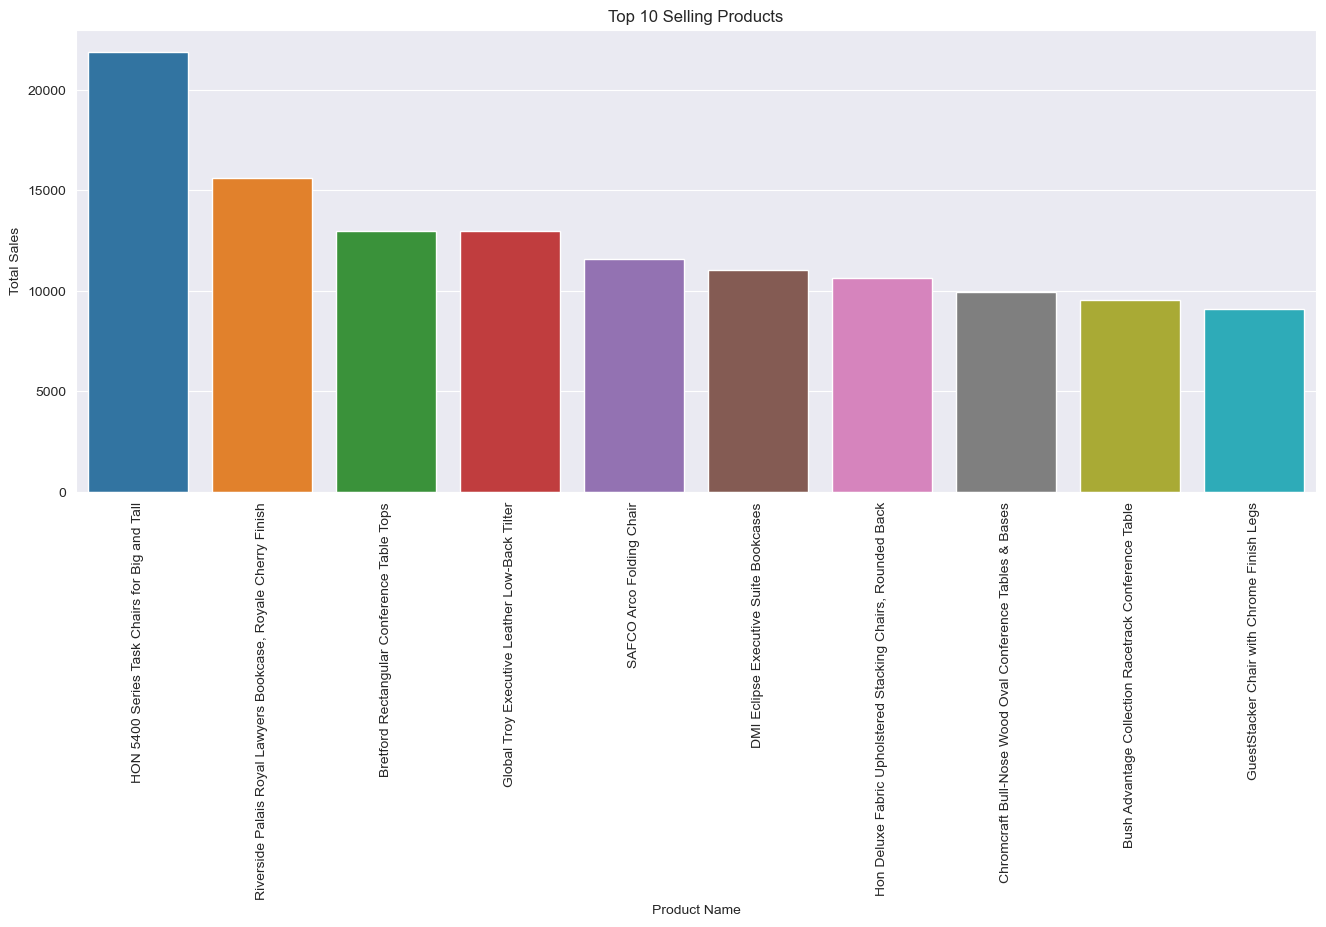

In [18]:
# High Selling Products
print("=" * 60)
print("TOP 10 HIGH SELLING PRODUCTS")
print("=" * 60)
print(product_performance[["Product Name", "Total_Sales", "Avg_Sales", "Sales_Rank"]].sort_values("Sales_Rank").head(10))
print("\n\n")

plt.figure(figsize=(16, 6))
# Visualize the Total Sales
sns.barplot(data = product_performance.sort_values("Sales_Rank").head(10), x= "Product Name", y= "Total_Sales", hue="Product Name")
plt.title("Top 10 Selling Products")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

TOP 10 HIGH PROFIT PRODUCTS
                                          Product Name  Total_Profit  Profit_Percentage  Profit_Rank
163  GE 48" Fluorescent Tube, Cool White Energy Sav...     1260.2210          46.691176          1.0
141  Electrix 20W Halogen Replacement Bulb for Zoom...       78.2560          46.349206          2.0
159  Floodlight Indoor Halogen Bulbs, 1 Bulb per Pa...      197.1040          45.357143          3.0
110            Eldon 300 Class Desk Accessories, Black       13.0680          44.000000          4.0
151                          Executive Impressions 14"      166.2804          44.000000          5.0
162                GE 4 Foot Flourescent Tube, 40 Watt       42.2436          42.727273          6.0
318                       Regeneration Desk Collection       15.2064          42.352941          7.0
109            Eldon 200 Class Desk Accessories, Smoke       58.0272          42.000000          8.0
59   C-Line Magnetic Cubicle Keepers, Clear Polypro...       56

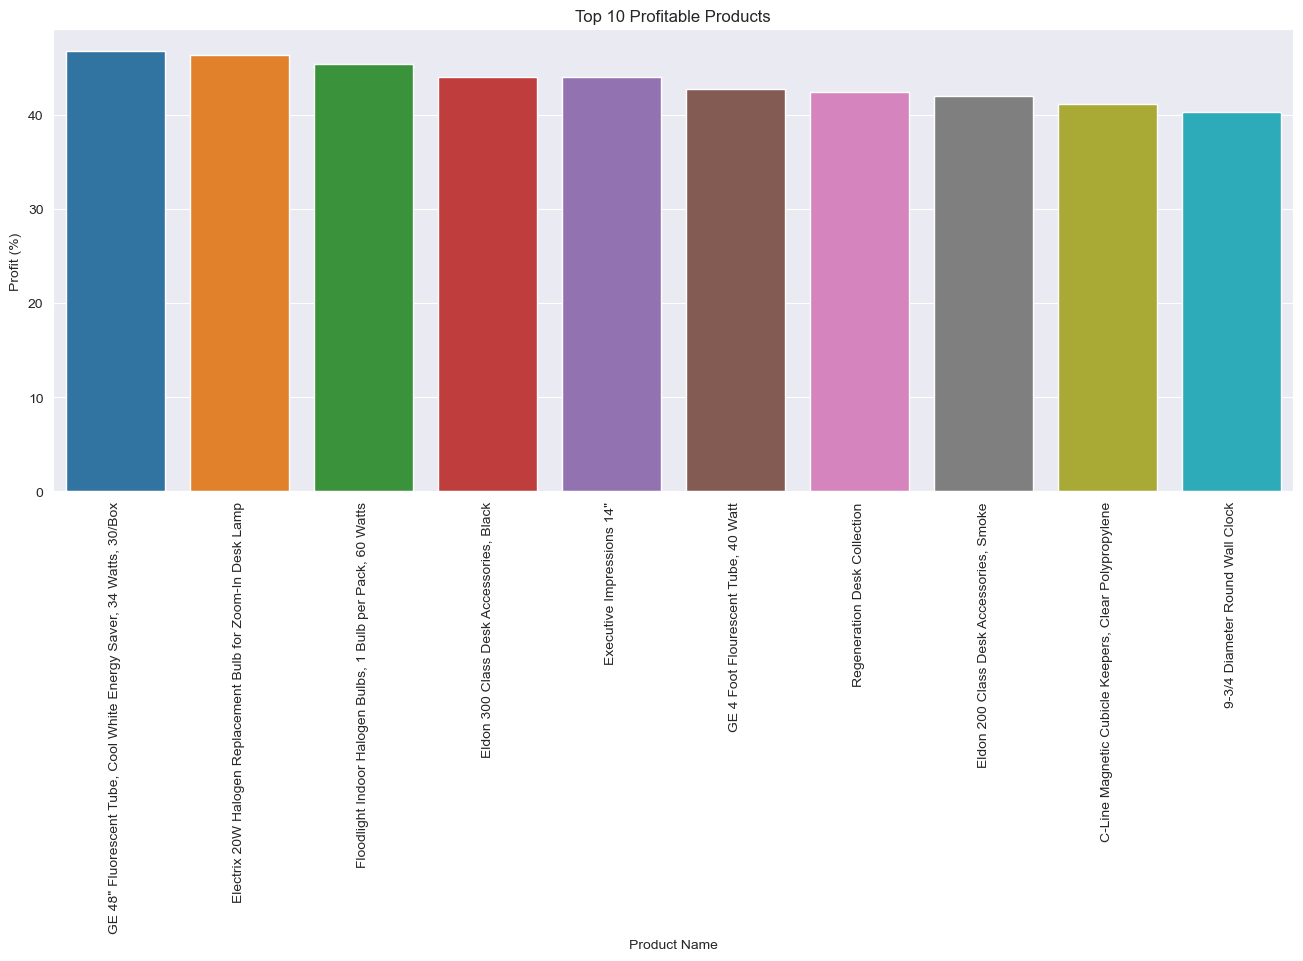

In [19]:
# High Profit Products
print("=" * 60)
print("TOP 10 HIGH PROFIT PRODUCTS")
print("=" * 60)
print(product_performance[["Product Name", "Total_Profit", "Profit_Percentage", "Profit_Rank"]].sort_values("Profit_Rank").head(10))
print("\n\n")

plt.figure(figsize=(16, 6))
# Visualize the Total Sales
sns.barplot(data = product_performance.sort_values("Profit_Rank").head(10), x= "Product Name", y= "Profit_Percentage", hue="Product Name")
plt.title("Top 10 Profitable Products")
plt.ylabel("Profit (%)")
plt.xticks(rotation=90)
plt.show()

TOP 10 HIGH DEMAND PRODUCTS
                                          Product Name  Total_Quantity  Quantity_Rank
257                         KI Adjustable-Height Table              74            1.0
351         Situations Contoured Folding Chairs, 4/Set              64            2.0
355                         Staple-based wall hangings              62            3.0
140                        Eldon Wave Desk Accessories              61            4.5
66                  Chromcraft Round Conference Tables              61            4.5
204    Global Wood Trimmed Manager's Task Chair, Khaki              59            6.0
186          Global High-Back Leather Tilter, Burgundy              54            7.0
325                           SAFCO Arco Folding Chair              53            8.0
158                             Flat Face Poster Frame              51            9.5
225  Hon Deluxe Fabric Upholstered Stacking Chairs,...              51            9.5





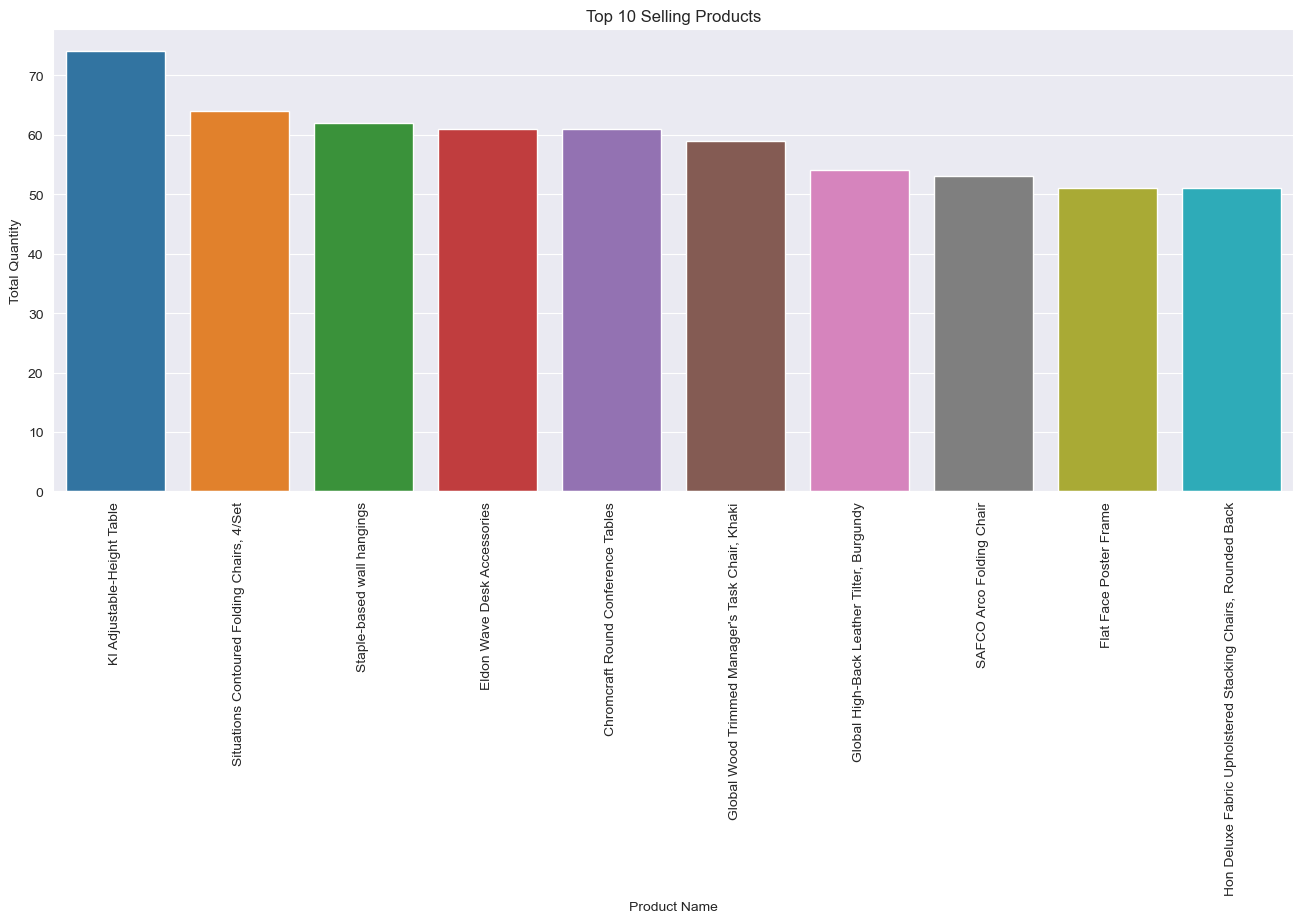

In [20]:
# High Demand Products
print("=" * 60)
print("TOP 10 HIGH DEMAND PRODUCTS")
print("=" * 60)
print(product_performance[["Product Name", "Total_Quantity", "Quantity_Rank"]].sort_values("Quantity_Rank").head(10))
print("\n\n")

plt.figure(figsize=(16, 6))
# Visualize the Total Quantity
sns.barplot(data = product_performance.sort_values("Quantity_Rank").head(10), x= "Product Name", y= "Total_Quantity", hue="Product Name")
plt.title("Top 10 Demanding Products")
plt.ylabel("Total Quantity")
plt.xticks(rotation=90)
plt.show()

10 LOW DEMAND PRODUCTS
                                          Product Name  Total_Quantity  Quantity_Rank
366  Tenex Traditional Chairmats for Hard Floors, A...               4          370.0
47    Bush Cubix Collection Bookcases, Fully Assembled               4          370.0
150  Executive Impressions 13-1/2" Indoor/Outdoor W...               3          374.5
15   Atlantic Metals Mobile 2-Shelf Bookcases, Cust...               3          374.5
54   Bush Westfield Collection Bookcases, Dark Cher...               3          374.5
265               Linden 12" Wall Clock With Oak Frame               3          374.5
24   Barricks Non-Folding Utility Table with Steel ...               2          377.5
373      Ultra Commercial Grade Dual Valve Door Closer               2          377.5
181  Global Enterprise Series Seating Low-Back Swiv...               1          379.5
51   Bush Saratoga Collection 5-Shelf Bookcase, Han...               1          379.5





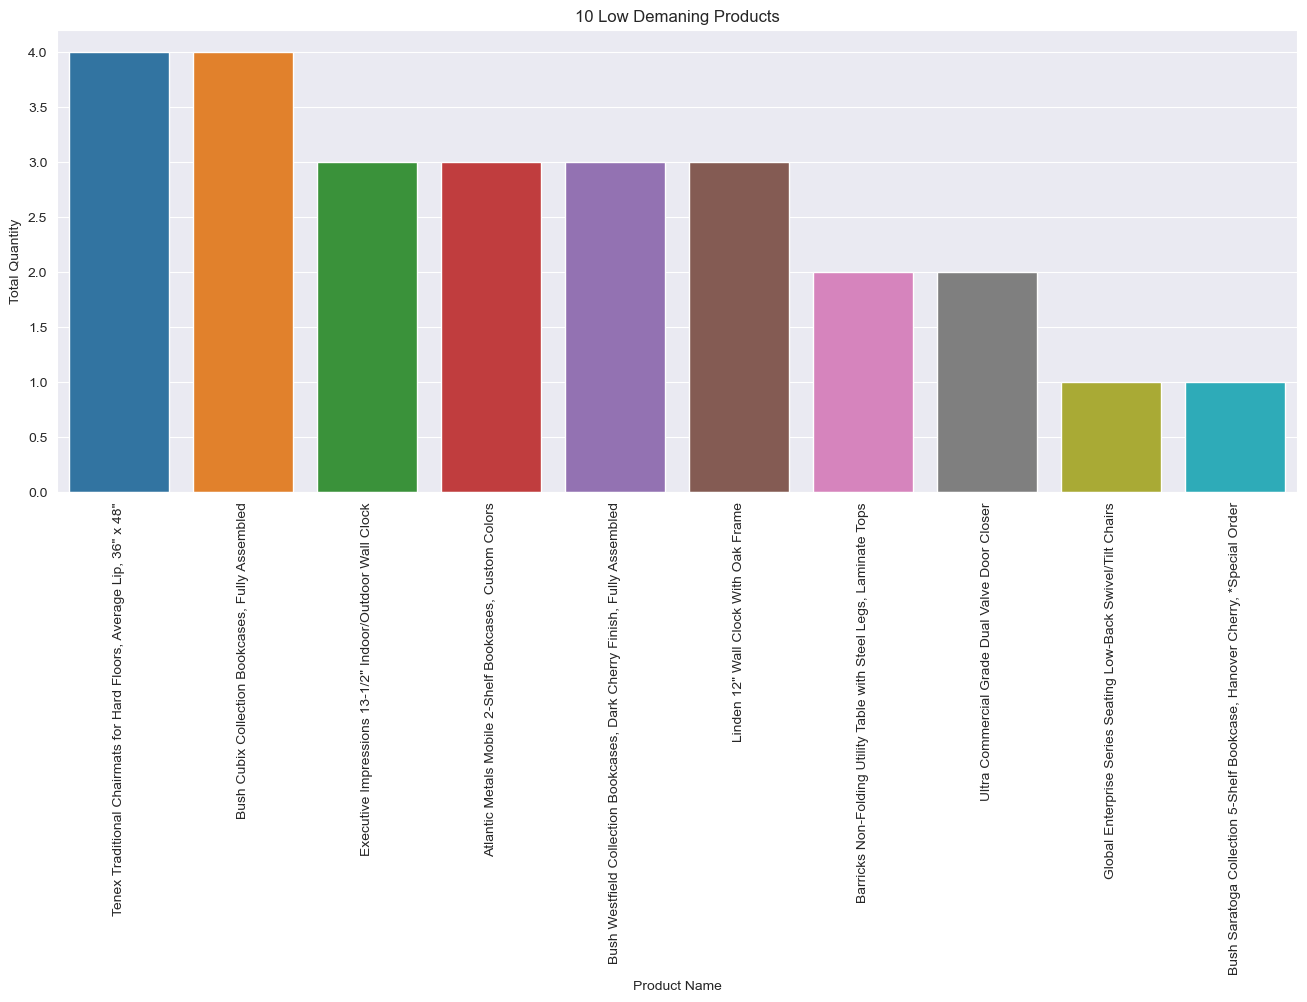

In [22]:
# Low Demand Products
print("=" * 60)
print("10 LOW DEMAND PRODUCTS")
print("=" * 60)
print(product_performance[["Product Name", "Total_Quantity", "Quantity_Rank"]].sort_values("Quantity_Rank").tail(10))
print("\n\n")

plt.figure(figsize=(16, 6))
# Visualize the Total Quantity
sns.barplot(data = product_performance.sort_values("Quantity_Rank").tail(10), x= "Product Name", y= "Total_Quantity", hue="Product Name")
plt.title("10 Low Demaning Products")
plt.ylabel("Total Quantity")
plt.xticks(rotation=90)
plt.show()

SEGMENTATION SUMMARY
Segment
Low Sales, High Profit     132
High Sales, Low Profit     132
Low Sales, Low Profit       58
High Sales, High Profit     58
Name: count, dtype: int64


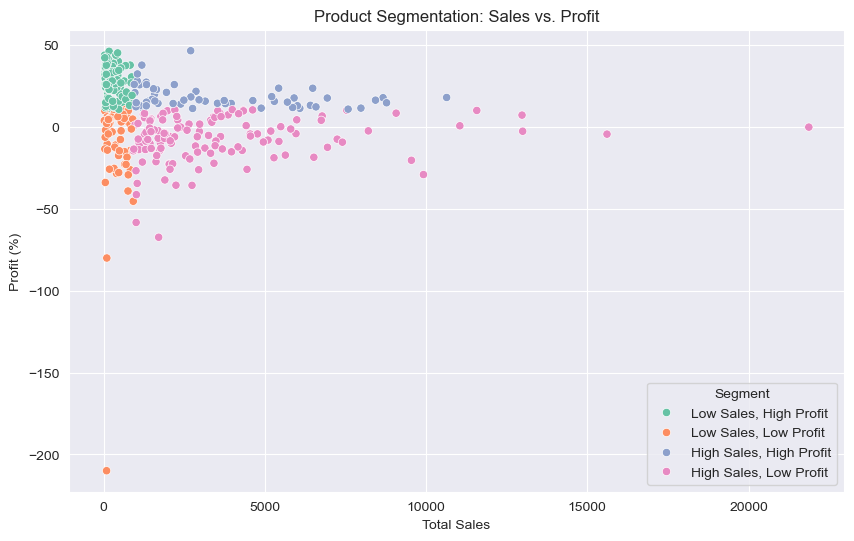

In [24]:
# Categorize the Products in terms of Sales and Profit Margin
# Define thresholds (using median as an example)
sales_median = product_performance['Total_Sales'].median()
profit_median = product_performance['Profit_Percentage'].median()

# Categorize products
def categorize(row):
    if row['Total_Sales'] > sales_median and row['Profit_Percentage'] > profit_median:
        return 'High Sales, High Profit'
    elif row['Total_Sales'] > sales_median and row['Profit_Percentage'] <= profit_median:
        return 'High Sales, Low Profit'
    elif row['Total_Sales'] <= sales_median and row['Profit_Percentage'] > profit_median:
        return 'Low Sales, High Profit'
    else:
        return 'Low Sales, Low Profit'

product_performance['Segment'] = product_performance.apply(categorize, axis=1)

# Count of products in each segment
print("=" * 60)
print("SEGMENTATION SUMMARY")
print("=" * 60)
segment_counts = product_performance['Segment'].value_counts()
print(segment_counts)

# Visualization: Scatter plot of Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=product_performance,
    x='Total_Sales', y='Profit_Percentage',
    hue='Segment', palette='Set2'
)
plt.title('Product Segmentation: Sales vs. Profit')
plt.xlabel('Total Sales')
plt.ylabel('Profit (%)')
plt.legend(title='Segment')
plt.show()

### Key Findings

#### High Performers:

- Products with high sales and profit margin should be prioritized for promotions or further analysis to replicate their success.

#### Low Performers:

- Products with low sales and profit margins should be reviewed for potential issues (e.g., high costs, low demand).
#### Opportunities:

- Products with high sales but low profit margins may require price optimization or cost reduction strategies.

#### Segmentation

- **High Sales, High Profit:**

    - These are your star products. Focus on expanding their reach or replicating their success.

- **High Sales, Low Profit:**

    - These are potential opportunities for cost optimization or price adjustment to improve profitability.

- **Low Sales, High Profit:**

    - These products are niche but profitable. Consider targeted marketing to grow their sales.

- **Low Sales, Low Profit:**

    - These are underperforming products. Investigate for possible discontinuation, rebranding, or cost reduction.


### Market Basket Analysis

- **Goal:** Discover frequently purchased product sub-category combinations.

#### Techniques:

- Use Association Rule Mining (e.g., Apriori or FP-Growth algorithms).
- Evaluate rules based on support, confidence, and lift.

In [73]:
# Prepare Data: Convert the data to basket format
basket= df.groupby(["Order ID", "Sub-Category"])["Quantity"].sum().unstack().fillna(0)
basket= basket.applymap(lambda x: 1 if x > 0 else 0)

# Sanity check
basket.head()

Sub-Category,Bookcases,Chairs,Furnishings,Tables
Order ID,,,,
CA-2014-100090,0,0,0,1
CA-2014-100678,0,1,0,0
CA-2014-100706,0,0,1,0
CA-2014-100916,0,0,0,1
CA-2014-101462,0,0,1,0


In [74]:
# Find frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Display top frequent itemsets
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

    support                  itemsets
2  0.497166             (Furnishings)
1  0.326531                  (Chairs)
3  0.174036                  (Tables)
0  0.126984               (Bookcases)
6  0.056122     (Furnishings, Chairs)
8  0.024943     (Furnishings, Tables)
7  0.017574          (Tables, Chairs)
5  0.017007  (Furnishings, Bookcases)
4  0.011905       (Bookcases, Chairs)


In [75]:
# Generate Association rules
rules = association_rules(frequent_itemsets, metric= "lift", min_threshold= 0.3)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Furnishings),(Chairs),0.497166,0.326531,0.056122,0.112885,0.345710,-0.106217,0.759168,-0.790086
1,(Chairs),(Furnishings),0.326531,0.497166,0.056122,0.171875,0.345710,-0.106217,0.607196,-0.737548
2,(Tables),(Chairs),0.174036,0.326531,0.017574,0.100977,0.309243,-0.039254,0.749113,-0.730048
3,(Chairs),(Tables),0.326531,0.174036,0.017574,0.053819,0.309243,-0.039254,0.872945,-0.768342


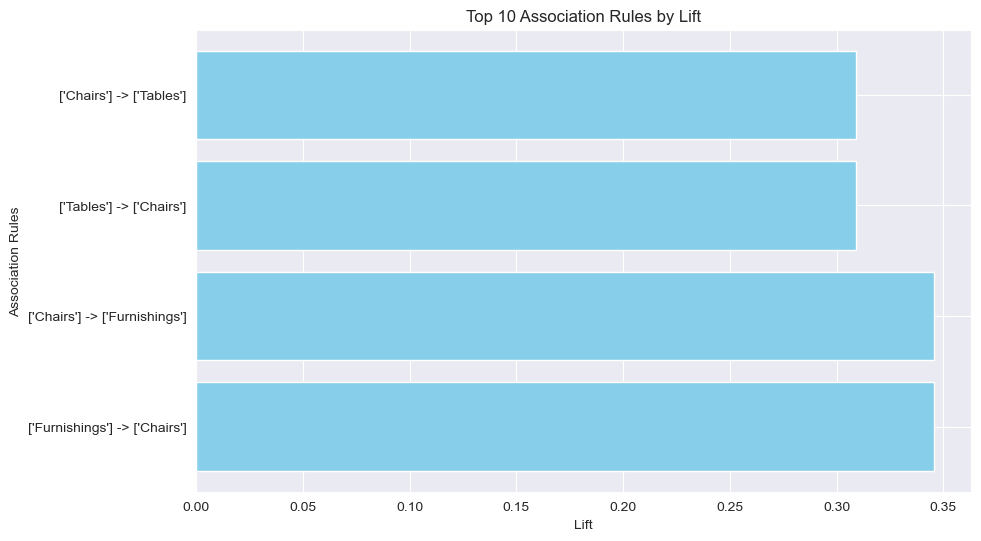

In [76]:
# Visualize top 10 rules by Lift
top_rules = rules.head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], color='skyblue')
plt.yticks(range(len(top_rules)), [f"{list(a)} -> {list(c)}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])])
plt.xlabel('Lift')
plt.ylabel('Association Rules')
plt.title('Top 10 Association Rules by Lift')
plt.show()

### Key Findings

From the given chart showing the **Top 10 Association Rules by Lift**, we can derive the following insights:

#### Frequent Co-Purchases:

- Customers frequently buy Chairs and Tables together. This indicates a strong complementary relationship between these products.
- Similarly, Furnishings and Chairs are often bought in combination, suggesting they are likely used in the same setting or context (e.g., home/office decor).

#### Bidirectional Relationships:

The rules highlight bidirectional associations. For instance:
- ["Chairs"] → ["Tables"]
- ["Tables"] → ["Chairs"] These reciprocal rules indicate strong dependencies, meaning customers often consider both items when making purchasing decisions.

#### Lift Values:

- Lift values for these associations are relatively **low (below 1)**, which suggests these rules, while valid, may not represent highly dominant patterns across the entire dataset.
- A lower lift could mean that while the rules are valid, **the combinations are not highly exceptional compared to random co-purchases**.

#### Potential Cross-Selling Opportunities:

- **Furnishings and Chairs** have an association. Stores can bundle these items or place them in close proximity to encourage cross-sales.
- The relationship between **Chairs and Tables** suggests a similar bundling or discount strategy.

#### Segmentation-Based Promotions:

- The rules point to specific product categories that tend to be purchased together. Marketing campaigns targeting customers purchasing Chairs could include discounts or recommendations for Tables or Furnishings.

#### Customer Behavior Insight:

- These associations reveal customers' preference to purchase items that complement each other in functionality or aesthetics, particularly for home or office use.